In [1]:
setwd('/import/DB/zhang/bulk/')

In [20]:
load('./fpkm.rda')

In [21]:
library(dplyr)

In [25]:
expr = data

In [26]:
library(tidyverse)

cellMarker <- read.csv("/import/liujing/data//cellmarker.txt", header = F, sep = "\t") # 用EXCEL打开删除NA列
cellMarker <- cellMarker %>% column_to_rownames("V1") %>% t()

In [27]:
a <- cellMarker
a <- a[1:nrow(a), ]
set <- colnames(a)
geneSet <- list()
# i <- "Activated CD8 T cell"
for (i in set) {
  x <-  as.character(a[,i])
  x <- x[nchar(x)!=0]
  x <-  as.character(x)
  geneSet[[i]] <-x
}

In [28]:
library(GSVA)

ssgsea <- gsva(as.matrix(expr), geneSet, method='ssgsea', kcdf='Gaussian', abs.ranking=TRUE,min.sz > 1)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message in .filterFeatures(expr, method):
"211 genes with constant expression values throuhgout the samples."


Estimating ssGSEA scores for 28 gene sets.
[1] "Calculating ranks..."


Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


[1] "Calculating absolute values from ranks..."
  |======================================================================| 100%

[1] "Normalizing..."


In [29]:
a <- ssgsea %>% t() %>% as.data.frame()

In [32]:
a$group=c(rep("OS",23),rep("Con",13)) 

In [33]:
a <- a %>% rownames_to_column("sample")

In [34]:
write.table(a, "ssGSEA.txt", sep = "\t", row.names = T, col.names = NA, quote = F)

In [35]:
ssgsea.1 <- ssgsea
for (i in colnames(ssgsea)) {
  #i <- colnames(ssgsea)[1]
  ssgsea.1[,i] <- (ssgsea[,i] -min(ssgsea[,i]))/(max(ssgsea[,i] )-min(ssgsea[,i] ))
  
}
apply(ssgsea.1[,1:6], 2, range)

GSM6733214_T103,GSM6733215_T105,GSM6733216_T109,GSM6733217_T110,GSM6733218_T111,GSM6733219_T112
0,0,0,0,0,0
1,1,1,1,1,1


In [36]:
library(ggpubr)

Warning message:
"package 'ggpubr' was built under R version 4.2.3"


In [37]:
options(repr.plot.width = 14)

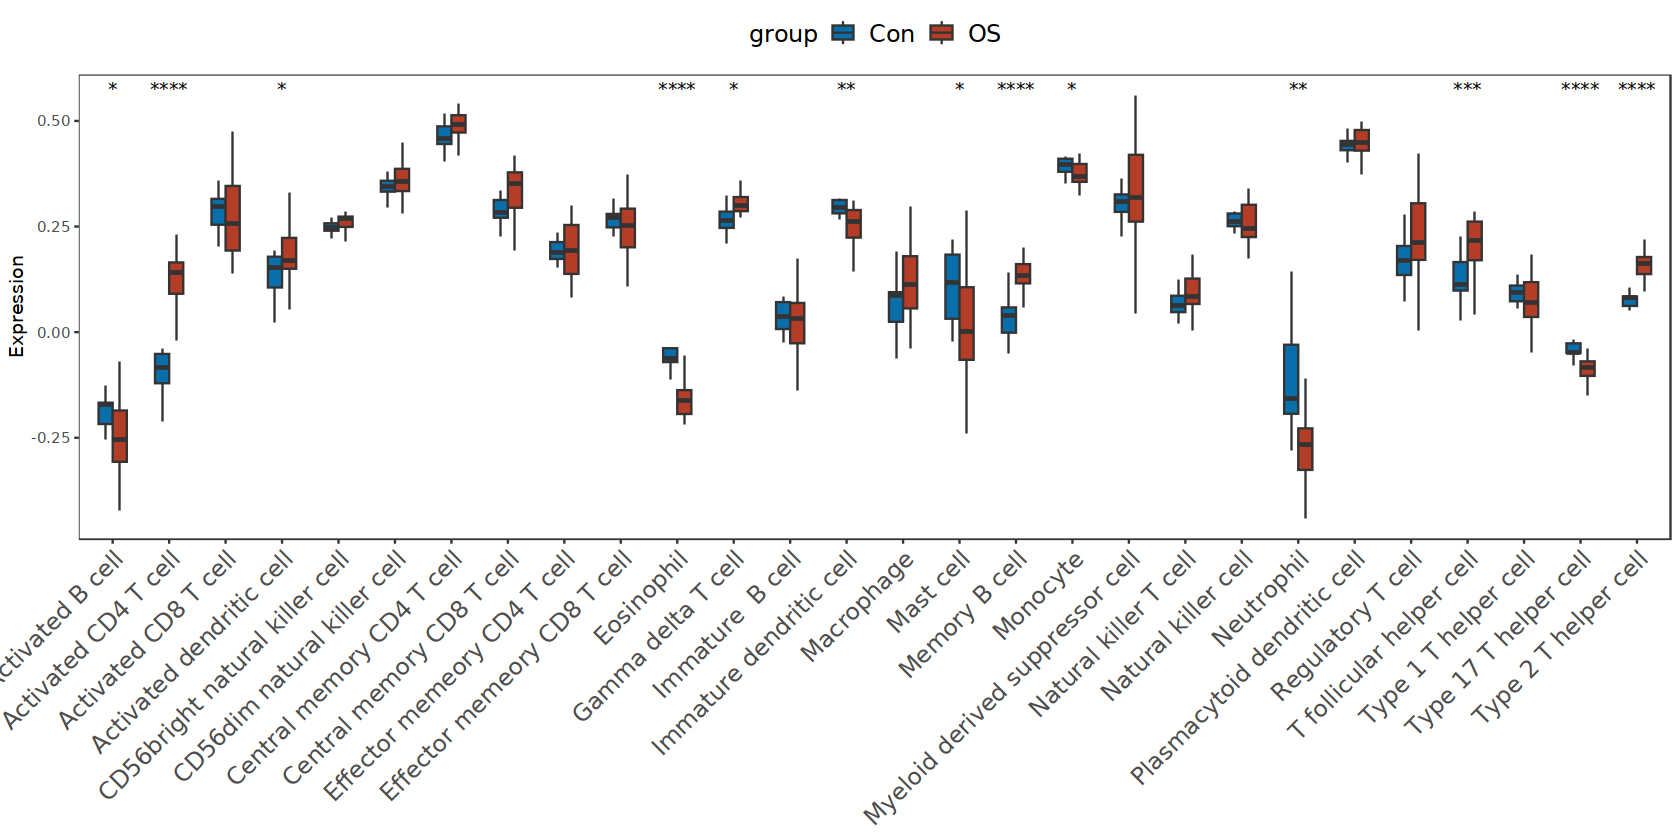

In [38]:
LUAD_ggsea <- gather(a,key = ssgsea, value = Expression, -c(group,sample)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "t.test",
                     hide.ns = T)

In [41]:
expr1 = expr[ c('ACHE','AP1AR','EHD3','FUT8','MVB12A','TBC1D16'),] %>% t() %>%  as.data.frame()

In [42]:
cell   = ssgsea %>% t() %>% as.data.frame() 

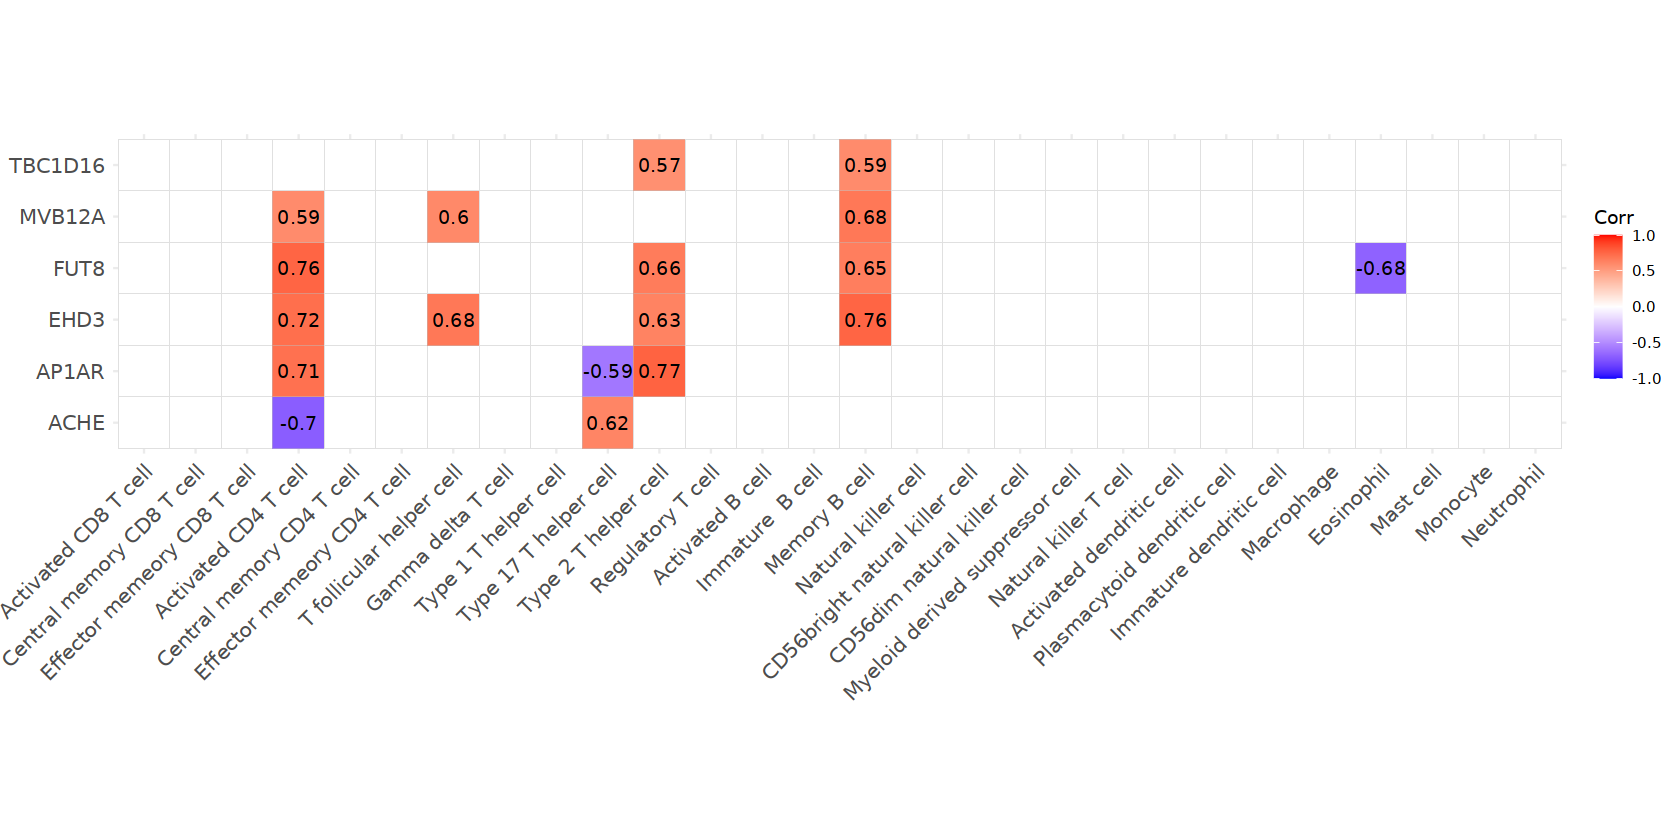

In [45]:
sig_gene <- c('ACHE','AP1AR','EHD3','FUT8','MVB12A','TBC1D16')


library(psych)
x <- expr1[,sig_gene]
y <- cell


library(psych)
d <- corr.test(x,y,use="complete",method = 'spearman')

r <- d$r
p <- d$p

library(ggcorrplot)
ggcorrplot(t(d$r), show.legend = T, 
           p.mat = t(d$p.adj), digits = 2,  sig.level = 0.05,insig = 'blank',lab = T)

### 读取nmf分组

In [118]:
load('bulk2.rda')

In [119]:
b=  a %>%  dplyr::filter(sample %in%  rownames(groupinfo))

In [120]:
b$group = groupinfo$group

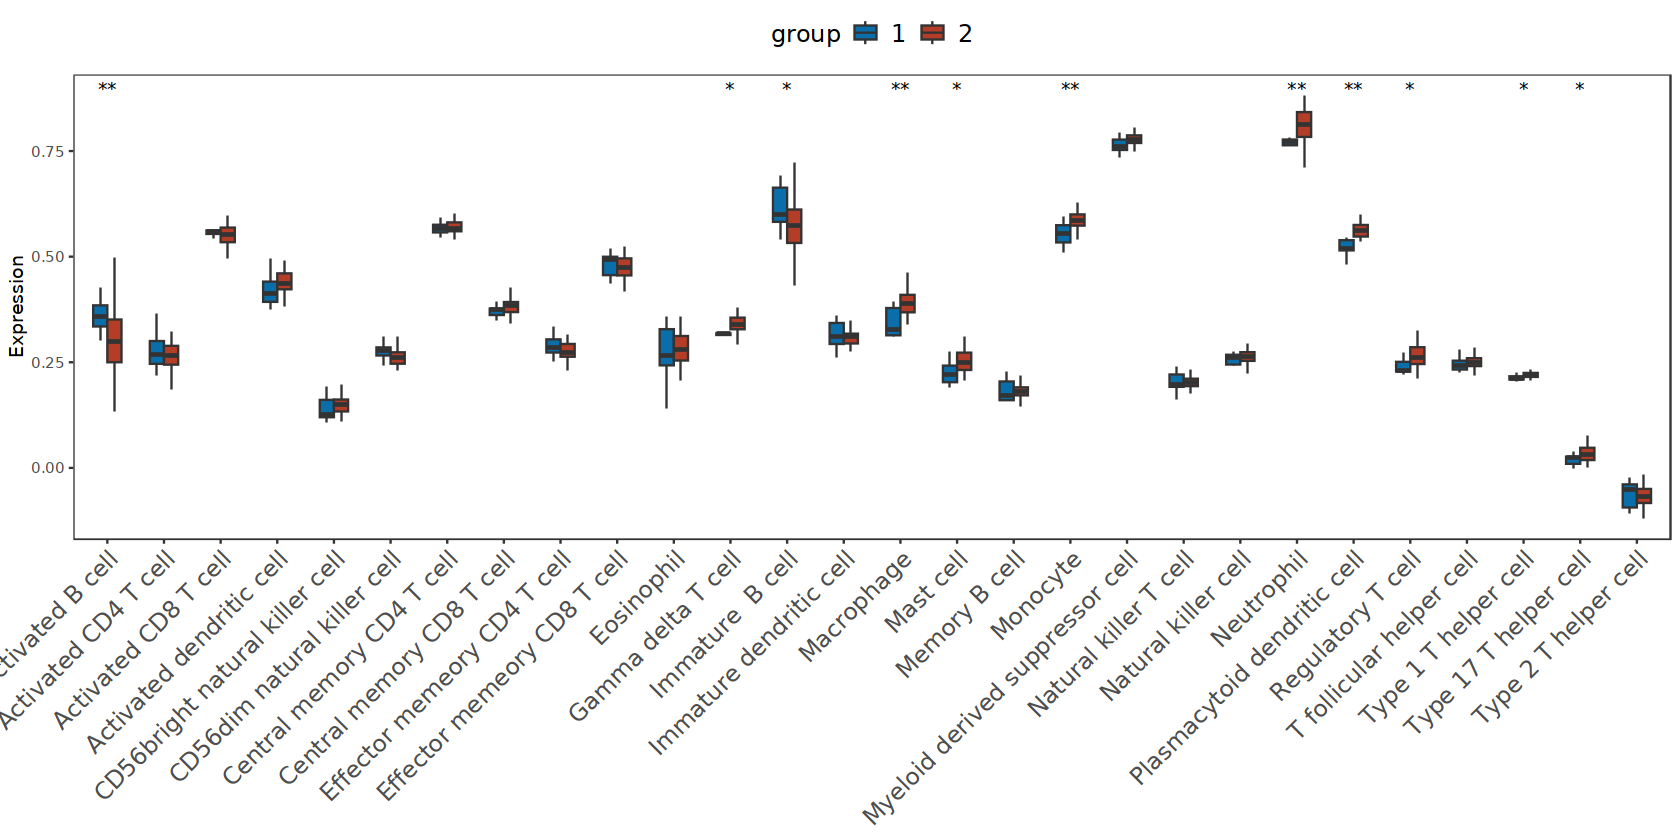

In [121]:
LUAD_ggsea <- gather(b,key = ssgsea, value = Expression, -c(group,sample)) 

ggplot(LUAD_ggsea, aes(x = ssgsea, y = Expression)) + 
  labs(y="Expression", x =  NULL) +  
  geom_boxplot(aes(fill = group), position = position_dodge(0.5), width = 0.5, outlier.alpha = 0) + 
  scale_fill_manual(values = c("#096EA9", "#B33D27")) +
  theme_bw() + 
  theme(plot.title = element_text(size = 14,color="black",hjust = 0.5), 
        axis.text.x = element_text(angle = 45, hjust = 1 ,size = 14),
        panel.grid = element_blank(),
        legend.position = "top",
        legend.text = element_text(size= 14),
        legend.title= element_text(size= 14)) + 
  stat_compare_means(aes(group =  group),
                     label = "p.signif",
                     method = "wilcox.test",
                     hide.ns = T)

In [122]:
write.csv(a,file = 'ssgsea.csv',row.names =F)

### lasso回归后的细胞

In [123]:
sig_gene <- c('TNFSF14','CCNA2','MARCKS','SGOL1','SAP130')


library(psych)
x <- expr[,sig_gene]
y <- cell

In [128]:
load('./lasso.cell.rda')

In [129]:
y1 = y %>%  dplyr::select(gene_1se)

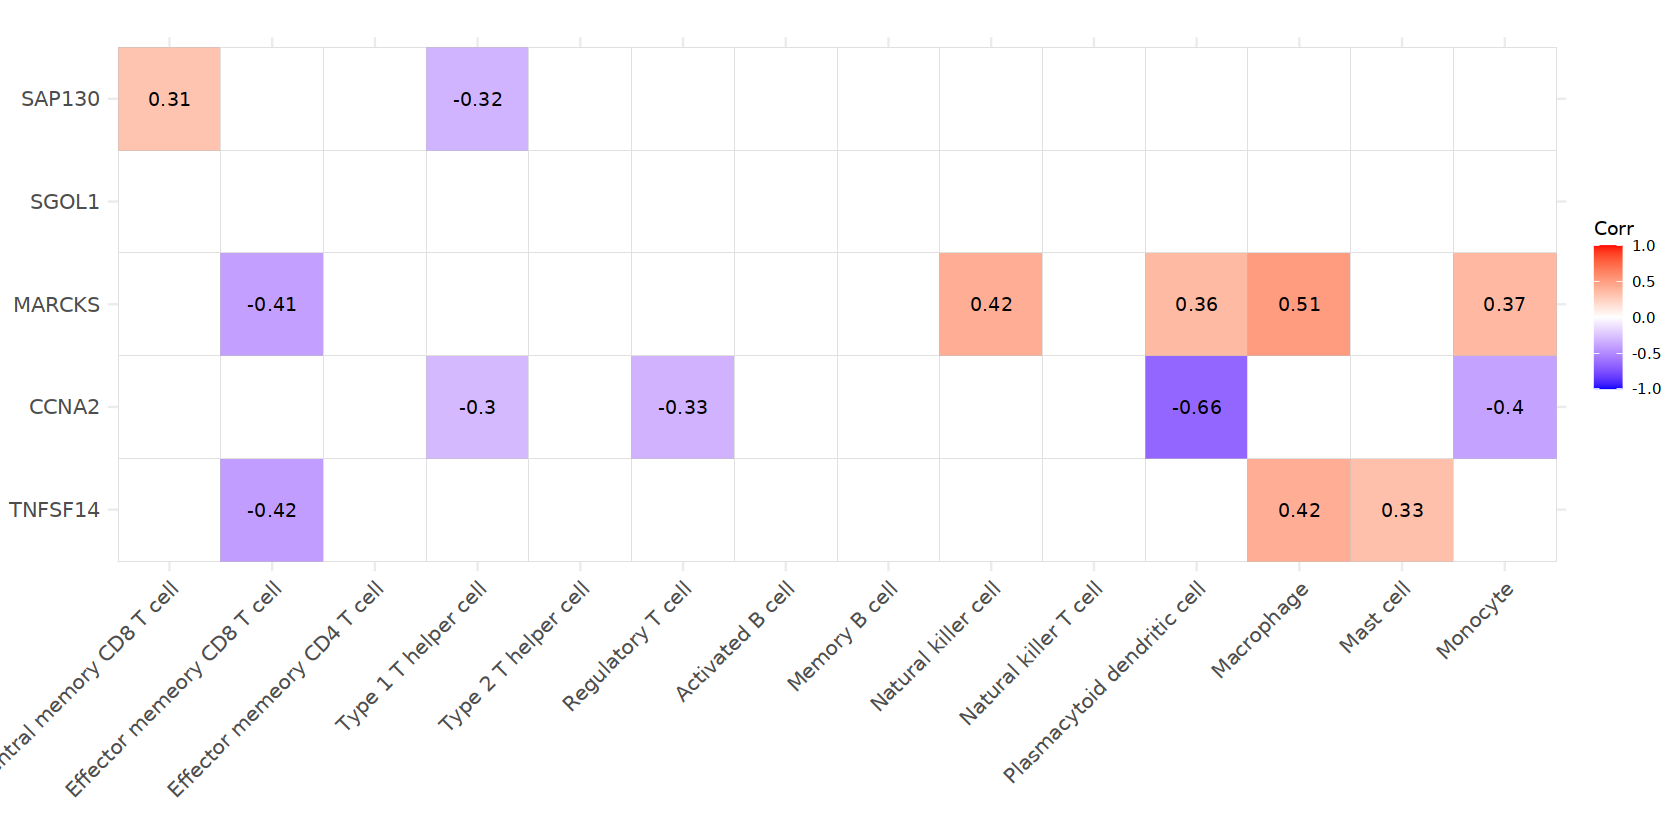

In [132]:
library(psych)
d <- corr.test(x,y1,use="complete",method = 'spearman')

r <- d$r
p <- d$p

library(ggcorrplot)
ggcorrplot(t(d$r), show.legend = T, 
           p.mat = t(d$p.adj), digits = 2,  sig.level = 0.05,insig = 'blank',lab = T)